# Reading numpy files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
df = np.load('/content/drive/MyDrive/USML_final_project/Final/data_3d_final.npy', allow_pickle=True)
labels = np.load('/content/drive/MyDrive/USML_final_project/Final/labels_final.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df[0].shape

(5, 18, 13)

# Padding the data to make it into symmetric size

In [ ]:
p = np.pad(df[0], pad_width=((0,0), (2, 0), (0, 7)))

In [ ]:
p.transpose((1,2,0)).shape

(20, 20, 5)

In [ ]:
df1 = np.pad(df, pad_width=((0,0),(0,0), (1, 1), (3, 4)))
df1 = df1.transpose((0,2,3,1))
df1.shape

(7553, 20, 20, 5)

# AUto-Encoder Architecture

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(20, 20, 5))

x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(4, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(5, (3, 3), activation='linear', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics='mae')

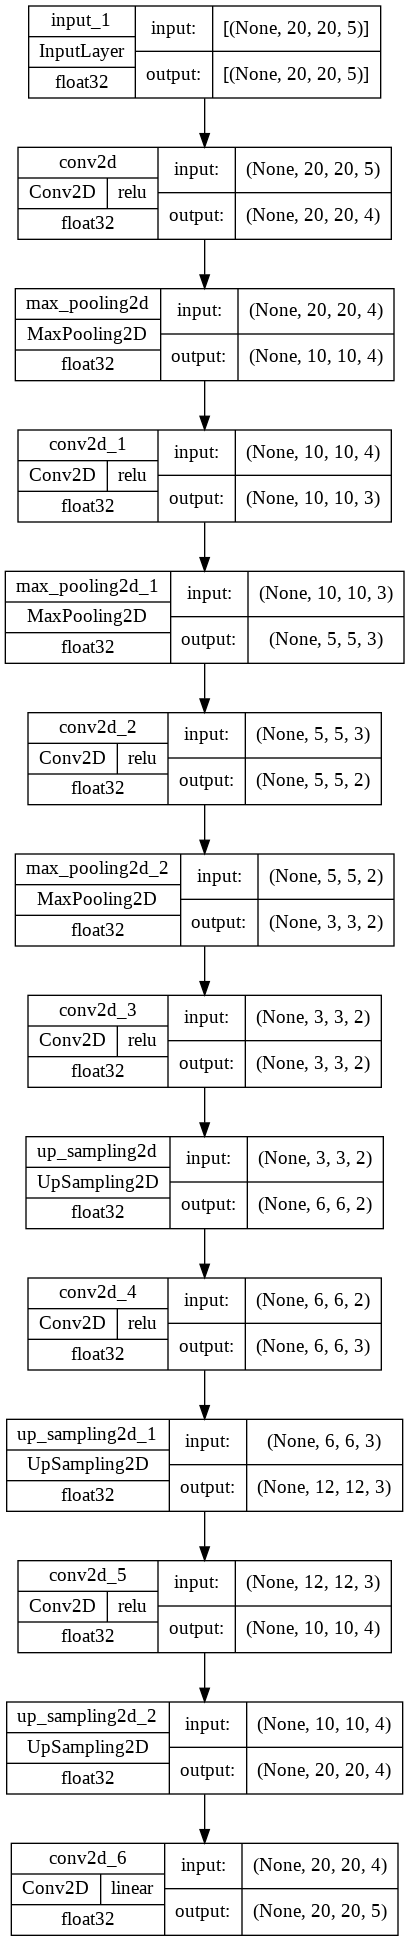

In [ ]:
import tensorflow
#autoencoder = keras.Model(input_img, decoded)
#autoencoder.compile(optimizer='adam', loss='mae')
tensorflow.keras.utils.plot_model(autoencoder, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 20, 5)]       0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 4)         184       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 3)         111       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 3)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 2)           56    

In [ ]:
history = autoencoder.fit(df1, df1,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_split = 0.2)

Epoch 1/100
48/48 [==============================] - 9s 150ms/step - loss: 8770.1328 - mae: 35.1465 - val_loss: 9351.5195 - val_mae: 37.8832
Epoch 2/100
48/48 [==============================] - 4s 84ms/step - loss: 6585.0605 - mae: 44.1114 - val_loss: 5127.8184 - val_mae: 44.7078
Epoch 3/100
48/48 [==============================] - 4s 84ms/step - loss: 3537.6846 - mae: 41.1700 - val_loss: 2943.5630 - val_mae: 39.2731
Epoch 4/100
48/48 [==============================] - 4s 87ms/step - loss: 2140.3853 - mae: 35.4458 - val_loss: 2357.9573 - val_mae: 36.0019
Epoch 5/100
48/48 [==============================] - 4s 85ms/step - loss: 1608.0070 - mae: 30.8273 - val_loss: 1999.6785 - val_mae: 31.1461
Epoch 6/100
48/48 [==============================] - 4s 85ms/step - loss: 1221.9902 - mae: 24.7232 - val_loss: 1769.0865 - val_mae: 26.8104
Epoch 7/100
48/48 [==============================] - 4s 85ms/step - loss: 1017.9908 - mae: 20.8460 - val_loss: 1630.8160 - val_mae: 24.2401
Epoch 8/100
48/48 [

In [ ]:
encoder = keras.Model(input_img, encoded)

# Extracting the lantent space

In [ ]:
outputs = encoder.predict(df1)

237/237 [==============================] - 2s 7ms/step


In [ ]:
outputs.shape

(7553, 3, 3, 2)

In [ ]:
outputs1 = outputs.reshape(outputs.shape[0], -1)

In [ ]:
np.save('/content/drive/MyDrive/USML_final_project/Final/cnns1_final.npy',np.array(outputs1))